,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전출지,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
충청남도,240241,255973,212546,277908,268495,562558,344295,384884,422062,372344,444695,435356,447043,524543,516636,470881,462446,495793,520291,279524,278820,266897,233588,245580,234753,251923,246037,269231,253628,283195,273341,278169,288445,310057,329499,320445,329811,341850,339765,317511,301675,302546,277346,268053,279817,279680,271446,269337
충청남도,67033,63565,40803,53320,61038,115149,81692,76119,83411,77054,83934,83487,85697,92713,85798,79310,70815,74350,74634,55621,50923,42842,36934,33383,28352,26635,26741,26488,24143,28912,27407,26604,26741,26186,26035,26996,27214,27553,26659,26072,23115,21674,20638,19680,19841,19144,18726,18582
충청남도,4803,4599,3857,4961,7521,10430,9145,9924,10831,7780,8522,7921,6802,7063,6545,5571,5899,6388,6093,3131,3157,2569,2422,2087,1884,1847,1915,2398,2466,2615,2315,2463,2273,2590,2602,2707,2593,2747,2785,2741,2683,2881,2408,2328,2920,2548,2210,2303
충청남도,0,0,0,0,0,0,0,0,0,0,0,3453,3754,3834,3453,3057,3646,3643,3400,1757,1630,1432,1341,1318,1196,1393,1392,1479,1584,1619,1676,1570,1679,1840,1658,1943,1760,2039,1929,2011,1849,2128,1925,2038,2157,1999,1780,1754
충청남도,0,0,0,0,0,0,0,0,0,0,0,13948,12101,14864,15857,13834,13236,15325,15054,12016,12651,11859,10527,9571,8812,8292,8204,8471,7598,8860,8449,8136,9284,8544,8992,8734,8595,9110,8645,7899,7441,7214,7180,6793,6784,6636,6407,6251
충청남도,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1425,1671,1847,1016,1090,976,1005,864,775,868,946,1397,1171,1149,1134,1115,1206,1224,1354,1628,1580,1530,1606,1644,1554,1617,1489,1450,1797,1468,1427,1447
충청남도,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31199,32617,32568,25886,28190,26376,25953,25779,28966,24948,28084,25750,25347,26185,28359,28460,27386,26066,25609,23097,21214,21341,21494,18126,16502,17037,15551,15298,15082
충청남도,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,943,987,1052,1058,1017,1013,1031,1081,1072,1189,1231,1218,1025,1044,1306,1158,1376,1227,1468,1136,947
충청남도,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4514,2915,6103,8384,5868,6587


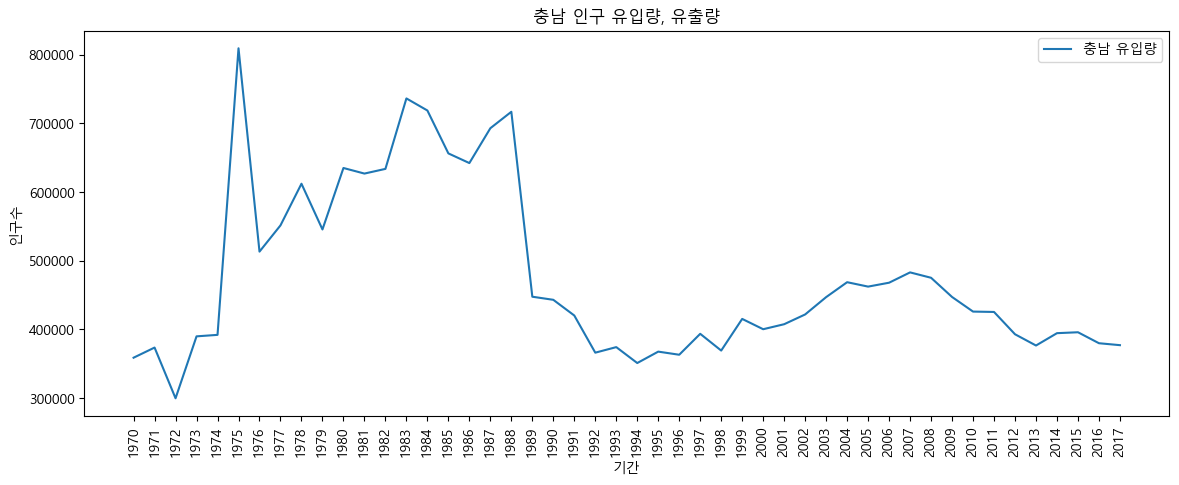

In [18]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:/Users/c403/pandas/part4/data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 데이터프레임 생략 안되게 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('C:/Users/c403/pandas/part4/data/시도별_전출입_인구수.xlsx')
# NaN 값을 바로 위의 값으로 변환
df = df.ffill()

# to_choongnam : 충남 인구 유입량, choongnam_to : 충남 인구 유출량
mask_to_choongnam = (df['전출지별'] != '충청남도') & (df['전입지별'] == '충청남도')
mask_choongnam_to = (df['전출지별'] == '충청남도') & (df['전입지별'] != '충청남도')

##################################충남 인구 유입량 처리#######################################
# df_to_choongnam : 충남 인구 유입량
df_to_choongnam = df[mask_to_choongnam]
df_to_choongnam = df_to_choongnam.drop(['전출지별'], axis=1)
df_to_choongnam = df_to_choongnam.rename({'전입지별' : '전입지'}, axis=1)
df_to_choongnam = df_to_choongnam.set_index('전입지')

# '충남 유입량' index 추가
df_to_choongnam.loc['충남 유입량', :] = 0

# 빈칸 값 0으로 대체하기
for i in range(len(df_to_choongnam['1970']) - 1):
    for j in range(len(df_to_choongnam.iloc[0])):
        if(df_to_choongnam.iloc[i,j] == '-'):
            df_to_choongnam.iloc[i,j] = 0
            
# 충남 유입량 계산
for i in range(len(df_to_choongnam['1970']) - 1):
    df_to_choongnam.loc['충남 유입량', :] += df_to_choongnam.iloc[i]
############################################################################################
# df_choongnam_to : 충남 인구 유출량
df_choongnam_to = df[mask_choongnam_to]
df_choongnam_to = df_choongnam_to.drop(['전입지별'], axis=1)
df_choongnam_to = df_choongnam_to.rename({'전출지별' : '전출지'}, axis=1)
df_choongnam_to = df_choongnam_to.set_index('전출지')

# '충남 유출량' index 추가
df_choongnam_to.loc['충남 유출량', :] = 0

# 빈칸 값 0으로 대체하기
for i in range(len(df_choongnam_to['1970']) - 1):
    for j in range(len(df_choongnam_to.iloc[0])):
        if(df_choongnam_to.iloc[i,j] == '-'):
            df_choongnam_to.iloc[i,j] = 0
            
# 충남 유출량 계산
for i in range(len(df_choongnam_to['1970']) - 1):
    df_choongnam_to.loc['충남 유출량', :] += df_choongnam_to.iloc[i]
##############################################################################################
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

to_choongnam = df_to_choongnam.loc['충남 유입량', :]
choongnam_to = df_choongnam_to.loc['충남 유출량', :]
# x, y축 데이터를 plot 함수에 입력 
plt.plot(choongnam_to.index, choongnam_to.values)

plt.title('충남 인구 유입량, 유출량')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('인구수')           #y축 이름

plt.legend(labels=['충남 유입량'], loc='best')     #범례 표시

df_choongnam_to